In [310]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Starting Data Preperation

In [311]:
oil = pd.read_csv("Sub_Oil_VLCC_Monthly.csv")
print(oil)

tscv = TimeSeriesSplit(n_splits=5)

     Unnamed: 0    542644    548869      93219     534737    36820    542661  \
0      19910101  216.0400  404.7017  146.25000   281.3800  155.250  214.4300   
1      19910201  149.0800  421.4927  115.66667   276.2600   95.750  140.6300   
2      19910301  119.0500  368.1324   86.33333   190.7900   80.800  107.5100   
3      19910401  121.9400  387.0115   79.66667   200.2700   77.000  110.7000   
4      19910501  125.7900  462.6200   82.80000   199.6400   78.600  114.9600   
..          ...       ...       ...        ...        ...      ...       ...   
392    20230901  684.4500  576.0000  568.45000  1024.2000  603.600  711.9000   
393    20231001  660.3750  656.1875  524.37500   970.3125  556.625  700.1250   
394    20231101  629.7500  688.1875  489.75000   919.5625  521.875  713.3125   
395    20231201  588.4500  589.7000  494.65000   868.7500  503.700  681.8500   
396    20240101  585.4375  509.5000  459.56250   845.3125  493.875  657.5625   

        10066    542456     24820  ... 

### Splitting

In [312]:
columns_array = [('542236'), ('67321'), ('549295'), ('41108'), ('541982')]

X = oil.drop(columns=['542236']) 
y = oil['542236']


X_train = X.iloc[:36]  
y_train = y.iloc[:36] 

X_test = X.iloc[36:]   
y_test = y.iloc[36:]   

# tscv = timeseries.obg = 5


print("Training set - X:", X_train.shape, " y:", y_train.shape)
print("Testing set - X:", X_test.shape, " y:", y_test.shape)

Training set - X: (36, 463)  y: (36,)
Testing set - X: (361, 463)  y: (361,)


#### Printing train data

In [313]:
print(X_train)

    Unnamed: 0  542644    548869      93219  534737      36820  542661  \
0     19910101  216.04  404.7017  146.25000  281.38  155.25000  214.43   
1     19910201  149.08  421.4927  115.66667  276.26   95.75000  140.63   
2     19910301  119.05  368.1324   86.33333  190.79   80.80000  107.51   
3     19910401  121.94  387.0115   79.66667  200.27   77.00000  110.70   
4     19910501  125.79  462.6200   82.80000  199.64   78.60000  114.96   
5     19910601  122.54  388.6436   93.25000  205.37   91.00000  111.36   
6     19910701  126.76  399.5766   83.25000  196.44   77.50000  116.01   
7     19910801  128.70  369.3638   81.50000  201.79   77.50000  118.15   
8     19910901  138.98  458.0834   87.79000  208.21   80.73000  129.48   
9     19911001  139.12  391.4952   87.91000  230.61   92.07000  129.65   
10    19911101  145.70  380.1453   88.16667  227.89   92.66667  136.89   
11    19911201  126.45  462.9812   83.50000  191.19   79.25000  115.69   
12    19920101  110.60  397.4758   72.

#### Printing test data

In [314]:
print(X_test)

     Unnamed: 0    542644    548869     93219     534737    36820    542661  \
36     19940101  129.4700  400.8779   67.2500   154.8900   70.250  119.0100   
37     19940201  132.0300  439.2517   75.7500   150.6400   85.000  121.8300   
38     19940301  130.2300  420.6200   81.7500   148.0900   84.000  119.8400   
39     19940401  128.5600  459.0385   82.2000   154.4900   79.800  118.0200   
40     19940501  138.9800  455.9721   89.7500   160.5600   94.500  129.4800   
..          ...       ...       ...       ...        ...      ...       ...   
392    20230901  684.4500  576.0000  568.4500  1024.2000  603.600  711.9000   
393    20231001  660.3750  656.1875  524.3750   970.3125  556.625  700.1250   
394    20231101  629.7500  688.1875  489.7500   919.5625  521.875  713.3125   
395    20231201  588.4500  589.7000  494.6500   868.7500  503.700  681.8500   
396    20240101  585.4375  509.5000  459.5625   845.3125  493.875  657.5625   

        10066    542456     24820  ...  543880+5433

# Linear Regression

In [315]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 83024402.67596817


### Accuracy

In [316]:
Accuracy = 100*(1-abs((y_test - y_pred)/y_test))

print(Accuracy.mean())

83.86633286877125


### Graph

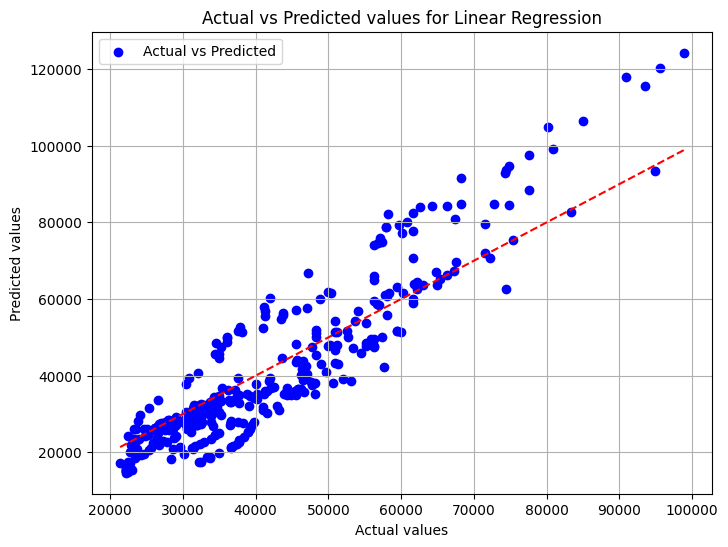

In [317]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted values for Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

# Lasso Regression

In [318]:
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength

# Step 3: Fit the model
lasso_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Step 5: Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Lasso): 19199906260.82132


### Accuracy

In [319]:
Accuracy = 100*(1-abs((y_test - y_pred_lasso)/y_test))

print(Accuracy.mean())

-197.10935837891856


### Graph

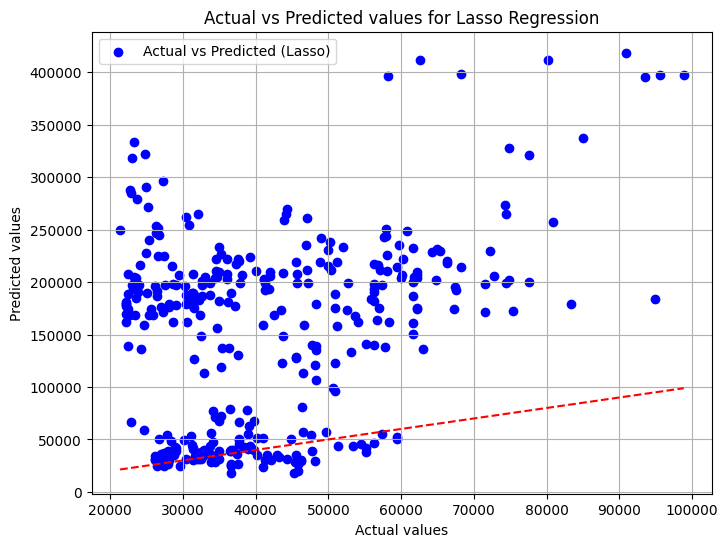

In [320]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', label='Actual vs Predicted (Lasso)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted values for Lasso Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

# SVR

In [321]:
# Step 2: Create an instance of SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Example hyperparameters, adjust as needed

# Step 3: Fit the model
svr_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_svr = svr_model.predict(X_test)

# Step 5: Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (SVR):", mse_svr)

Mean Squared Error (SVR): 350648796.334495


### Accuracy

In [322]:
Accuracy = 100*(1-abs((y_test - y_pred_svr)/y_test))

print(Accuracy.mean())

73.22378759861832


### Graph

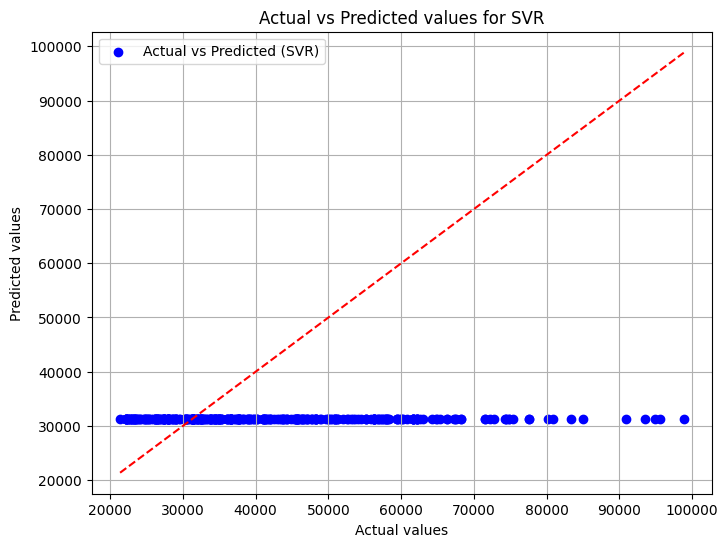

In [323]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Actual vs Predicted (SVR)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted values for SVR')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()